In [2]:
import numpy as np
import rawpy
from astropy.io import fits
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import astropy.stats as stats
import os
from astropy.stats import sigma_clip

In [3]:
directory = "C:/Users/ragna/Desktop/dark_set/fits-Saleh"
darks = []

In [4]:
for filename in os.listdir(directory):
    if filename.endswith(".FITS"):
        filepath = os.path.join(directory, filename)
        # Open the fits file
        file = fits.open(filepath)
        # Get the data from the first extension
        data = file[0].data
        # Apply sigma clipping to the data
        data_clipped = sigma_clip(data, sigma=5, cenfunc='median')
        # Summing over 3 channels
        data_mono = np.sum(data_clipped, axis=0)
        # Recorrecting shape
        if data_mono.shape == (3465, 5202):
            darks.append(data_mono)
        else:
            darks.append(np.transpose(data_mono, (1,0)))

In [5]:
dark_1 = np.median(darks[:15], axis=0)
dark_2 = np.median(darks[15:30], axis=0)
dark_3 = np.median(darks[30:45], axis=0)
dark_4 = np.median(darks[45:60], axis=0)
dark_5 = np.median(darks[60:75], axis=0)
dark_6 = np.median(darks[75:90], axis=0)
dark_7 = np.median(darks[90:105], axis=0)
dark_8 = np.median(darks[105:120], axis=0)
dark_9 = np.median(darks[120:], axis=0)


In [6]:
dark_list = [dark_1,dark_2,dark_3,dark_4,dark_5,dark_6,dark_7,dark_8,dark_9]
dark_array_median = np.array([np.median(i) for i in dark_list])
dark_array_variance = np.array([np.var(i) for i in dark_list])
times = np.array([0.00025, 0.001, 0.005, 0.01, 0.033, 0.1, 1.0, 10.0, 30.0])

Text(0.5, 1.0, 'Exposure = 0.00025 s')

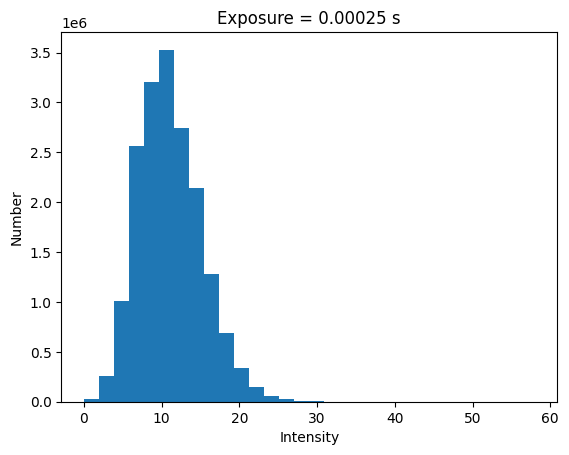

In [7]:
plt.hist(dark_1.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[0])+' s')

Text(0.5, 1.0, 'Exposure = 0.001 s')

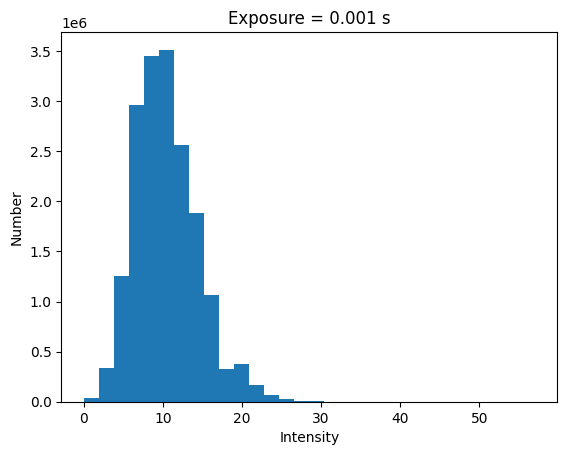

In [8]:
plt.hist(dark_2.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[1])+' s')

Text(0.5, 1.0, 'Exposure = 0.005 s')

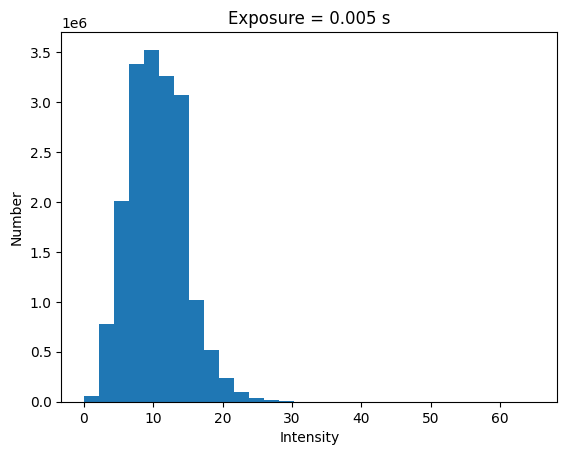

In [9]:
plt.hist(dark_3.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[2])+' s')

Text(0.5, 1.0, 'Exposure = 0.01 s')

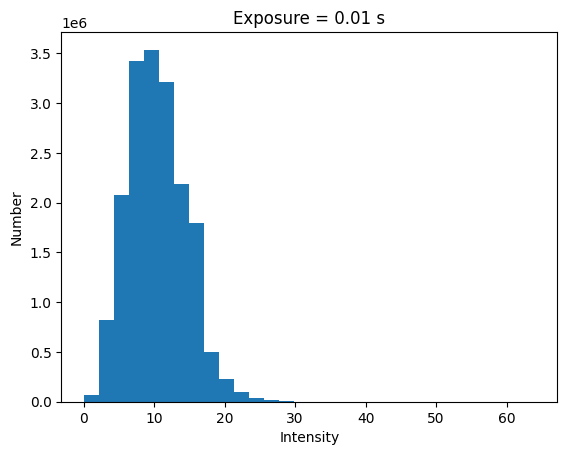

In [10]:
plt.hist(dark_4.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[3])+' s')

Text(0.5, 1.0, 'Exposure = 0.033 s')

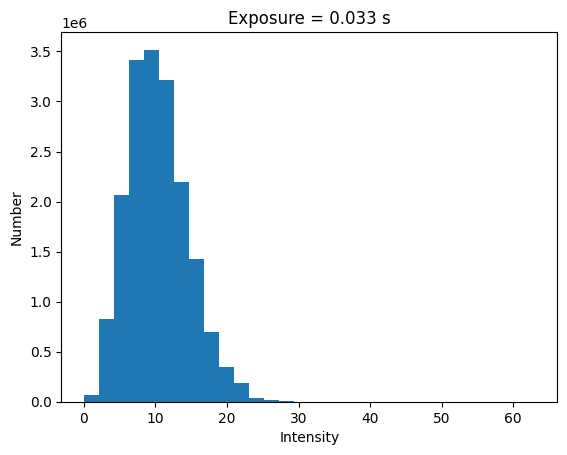

In [11]:
plt.hist(dark_5.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[4])+' s')

Text(0.5, 1.0, 'Exposure = 0.1 s')

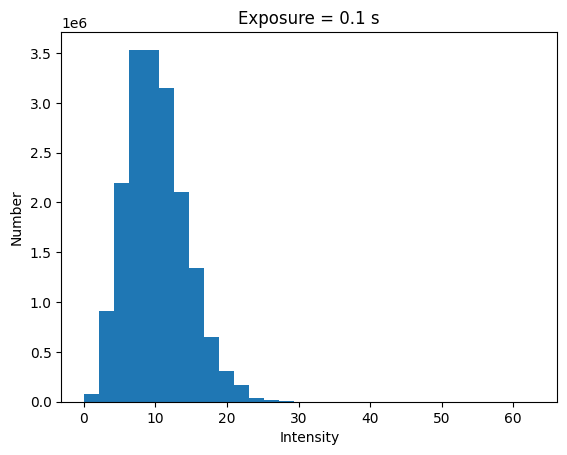

In [12]:
plt.hist(dark_6.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[5])+' s')

Text(0.5, 1.0, 'Exposure = 1.0 s')

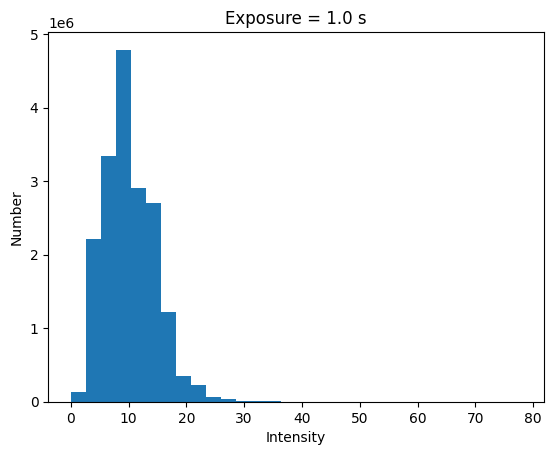

In [13]:
plt.hist(dark_7.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[6])+' s')

Text(0.5, 1.0, 'Exposure = 10.0 s')

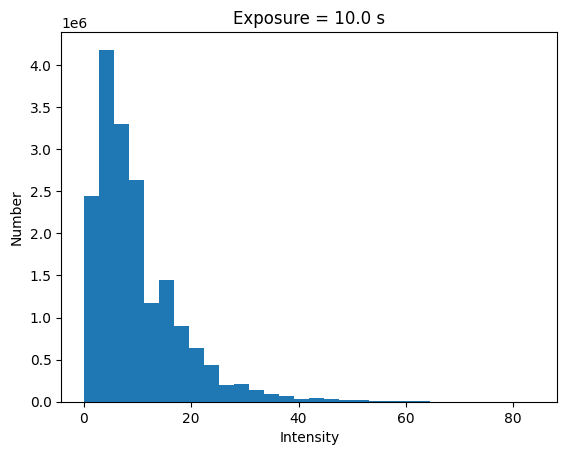

In [14]:
plt.hist(dark_8.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[7])+' s')

Text(0.5, 1.0, 'Exposure = 30.0 s')

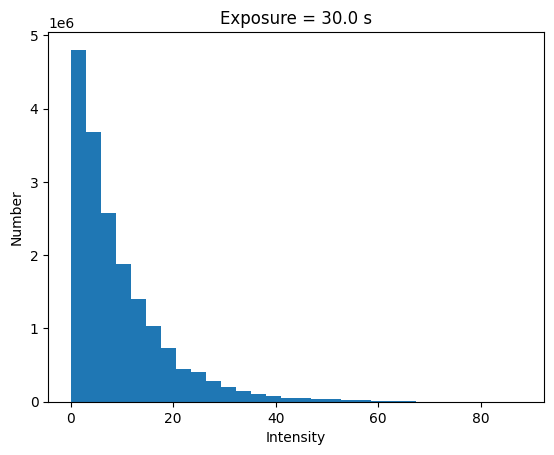

In [15]:
plt.hist(dark_9.flatten(), bins=30)
plt.xlabel('Intensity')
plt.ylabel('Number')
plt.title('Exposure = '+str(times[8])+' s')

Text(0.5, 1.0, 'Time-Intensity Plot')

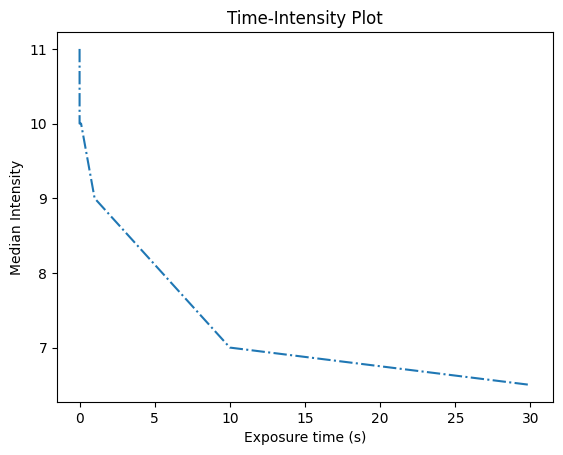

In [16]:
plt.plot(times, dark_array_median, '-.')
plt.xlabel('Exposure time (s)')
plt.ylabel('Median Intensity')
plt.title('Time-Intensity Plot')

Text(0.5, 1.0, 'Time-Variance Plot')

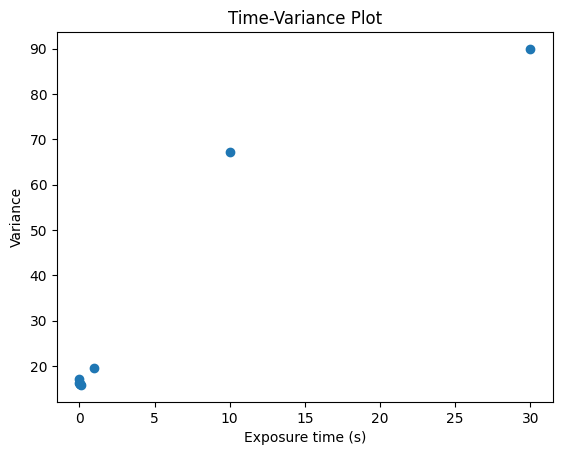

In [17]:
plt.plot(times, dark_array_variance,'o')
plt.xlabel('Exposure time (s)')
plt.ylabel('Variance')
plt.title('Time-Variance Plot')

In [18]:
dark_array_median

array([11. , 10. , 10. , 10. , 10. , 10. ,  9. ,  7. ,  6.5])